In [1]:
import os
import re

from collections import Counter
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Problem: Using work emails from December 2016, determine whether or not a future email requires a response.

In [3]:
#I am planning to convert various data into binary True/Flase variables and then use Linear Regression with one-hot encoding

In [4]:
#My data consists of email text data, as well as various metadata. NAtural variables include: Subject (text), Body (text), 
#From, (text), To(text), CC (text), Importance, and Reply (True/False). I will also create Y/N metrics that I believe will help determine
#whether or not a response is required. Those metrics include Name_To_Exclusive (email is only sent to me), Name_In_Body,
# CC_Bool (Name in CC field), as well as a word count labeled Body_Length.

In [5]:
#Using OLS Regression, I will look for results where my t score is greater than 2, and my 95% confidence interval
#does not include 0

In [6]:
 df = pd.read_csv('TestData2.csv')

In [7]:
df

,Subject,Body,From,To,CC,Importance,Reply
0,",Singh","Rajiv Ranjan""","Trivedi, Lokesh","Londeree, Michelle;Iman, Chad;Konduru, Rakesh;...",NaN,NaN,N
1,RE: Quick Reporting TB,I am in meetings until 6:00 eastern time � I c...,"Stogner, Stacey","Iman, Chad",NaN,Normal,Y
2,RE: Levi's Active PCs by half.xlsx,"Hi Chad,\r\n\r\nMy source is the BI report I h...","Oldham, James","Iman, Chad;Londeree, Michelle",NaN,Normal,N
3,FW: Merch Cancel Report- Rebuild,Hi Barbara.\r\n\r\n \r\n\r\nI currently proces...,"Lindsey, Nicole","Kleinhans, Barbara","Iman, Chad",Normal,N
4,RE: Quick Reporting TB,"Whenever Stacey is available, I can be availab...","Recinella, Sharmin","Stogner, Stacey;Iman, Chad",NaN,Normal,N
...,...,...,...,...,...,...,...
624,RE: LSA cubes under maintenance[Cubes accessible],"Hi All,\r\n\r\n \r\n\r\nMaintenance activity o...","Rawat, Garima",DL: Hyperion Planning,DL: Levi Hyperion Support,Normal,N
625,LSA cubes under maintenance[Cubes Inaccessible],"Hi All,\r\n\r\n \r\n\r\nLSA cubes will be unav...","Rawat, Garima",DL: Hyperion Planning,DL: Levi Hyperion Support,Normal,N
626,RE: LSA BI Super User Meeting,"Hi Chad, I would love to attend this week�s BI...","Walsh, Sara","Raubitschek, Micki;Iman, Chad",NaN,Normal,Y
627,Current PDU Extract Request,"MBX, Global Service Desk �\r\n\r\n \r\n\r\nPle...","Uyeda, Pauline","MBX, Global Service Desk;Iman, Chad","Londeree, Michelle;Distlistu, E2E_SAS_Applicat...",Normal,N


In [8]:
df['Name_To_Exclusive'] = np.where((df['To'].str.contains("Iman")) & (df['To'].str.len()<11), 'Yes', 'No')
#Add column and enter 1 where only my name is in the recipient field

In [9]:
df['Name_In_CC'] = np.where(df['CC'].str.contains("Iman"), 'Yes', 'No')
#Add column and enter 1 where my name is in the CC list

In [10]:
df['Name_In_Body'] = np.where(df['Body'].str.contains("Chad"), 'Yes', 'No')
#Add column and enter 1 where my first name is in the body of the email

In [11]:
df['Body_Length'] = df['Body'].str.lower().str.split().str.len().round()
#Add column with length of the body of the email
#Need to incorporate code below in order to only get counts before phrase "join skype meeting"

In [12]:
df['Body'].str.lower().str.split('join skype meeting')[1][0]
#Grab text before the phrase "join skype meeting"
#text is capturing meeting text with Skype Meeting

'i am in meetings until 6:00 eastern time \x96 i could possibly connect with you after that? \r\n\r\n-----original appointment-----\r\nfrom: iman, chad \r\nsent: wednesday, january 18, 2017 12:17 pm\r\nto: stogner, stacey\r\nsubject: quick reporting tb\r\nwhen: wednesday, january 18, 2017 1:00 pm-1:30 pm (utc-08:00) pacific time (us & canada).\r\nwhere: skype meeting\r\n\r\n\r\nhi stacey \x96 let me know if another time works better. i\x92m hoping we can chat today or tomorrow.\r\n\r\nthanks,\r\nchad\r\n.........................................................................................................................................\r\n--> '

In [13]:
df['CC_Bool'] = np.where(df['CC'].isnull() == False, 'Yes', 'No')

In [14]:
df['Body_Length'].describe()

C:\Users\Chad\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count     592.000000
mean      389.809122
std       589.741868
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max      3839.000000
Name: Body_Length, dtype: float64

In [15]:
df2 = df.dropna(subset =['Body_Length'])

In [16]:
df2['Body_Length'].describe()

count     592.000000
mean      389.809122
std       589.741868
min         0.000000
25%        36.000000
50%       165.000000
75%       495.250000
max      3839.000000
Name: Body_Length, dtype: float64

In [17]:
#Need to fix CC name
#Count before phrase "join skype meeting"

In [18]:
df2.loc[1,'Body']

'I am in meetings until 6:00 eastern time \x96 I could possibly connect with you after that? \r\n\r\n-----Original Appointment-----\r\nFrom: Iman, Chad \r\nSent: Wednesday, January 18, 2017 12:17 PM\r\nTo: Stogner, Stacey\r\nSubject: Quick Reporting TB\r\nWhen: Wednesday, January 18, 2017 1:00 PM-1:30 PM (UTC-08:00) Pacific Time (US & Canada).\r\nWhere: Skype Meeting\r\n\r\n\r\nHi Stacey \x96 let me know if another time works better. I\x92m hoping we can chat today or tomorrow.\r\n\r\nThanks,\r\nChad\r\n.........................................................................................................................................\r\n--> Join Skype Meeting <https://meet.levi.com/ciman/LJQ96Z69>       \r\nThis is an online meeting for Skype for Business, the professional meetings and communications app formerly known as Lync.\t\r\nJoin by phone\r\n+3226416000 x2087 : Brussels (Levi Global) \t\tEnglish (United States) \r\n+3226416510 : Brussels (Levi Global) \t\tEnglish (United S

In [19]:
df2.shape

(592, 12)

In [20]:
splits = df2['Body'].str.split('Join Skype')
df2['Body_New'] = splits.str[0]

C:\Users\Chad\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
df2['Body_Length'] = df2['Body_New'].str.lower().str.split().str.len().round()

C:\Users\Chad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
df2['Body_Length'].describe()

count     592.000000
mean      384.008446
std       590.669377
min         0.000000
25%        35.750000
50%       151.500000
75%       459.500000
max      3839.000000
Name: Body_Length, dtype: float64

In [23]:
df2

,Subject,Body,From,To,CC,Importance,Reply,Name_To_Exclusive,Name_In_CC,Name_In_Body,Body_Length,CC_Bool,Body_New
0,",Singh","Rajiv Ranjan""","Trivedi, Lokesh","Londeree, Michelle;Iman, Chad;Konduru, Rakesh;...",NaN,NaN,N,No,Yes,No,2,No,"Rajiv Ranjan"""
1,RE: Quick Reporting TB,I am in meetings until 6:00 eastern time � I c...,"Stogner, Stacey","Iman, Chad",NaN,Normal,Y,Yes,Yes,Yes,76,No,I am in meetings until 6:00 eastern time � I c...
2,RE: Levi's Active PCs by half.xlsx,"Hi Chad,\r\n\r\nMy source is the BI report I h...","Oldham, James","Iman, Chad;Londeree, Michelle",NaN,Normal,N,No,Yes,Yes,426,No,"Hi Chad,\r\n\r\nMy source is the BI report I h..."
3,FW: Merch Cancel Report- Rebuild,Hi Barbara.\r\n\r\n \r\n\r\nI currently proces...,"Lindsey, Nicole","Kleinhans, Barbara","Iman, Chad",Normal,N,No,Yes,No,231,Yes,Hi Barbara.\r\n\r\n \r\n\r\nI currently proces...
4,RE: Quick Reporting TB,"Whenever Stacey is available, I can be availab...","Recinella, Sharmin","Stogner, Stacey;Iman, Chad",NaN,Normal,N,No,Yes,Yes,140,No,"Whenever Stacey is available, I can be availab..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,RE: LSA cubes under maintenance[Cubes accessible],"Hi All,\r\n\r\n \r\n\r\nMaintenance activity o...","Rawat, Garima",DL: Hyperion Planning,DL: Levi Hyperion Support,Normal,N,No,No,No,108,Yes,"Hi All,\r\n\r\n \r\n\r\nMaintenance activity o..."
625,LSA cubes under maintenance[Cubes Inaccessible],"Hi All,\r\n\r\n \r\n\r\nLSA cubes will be unav...","Rawat, Garima",DL: Hyperion Planning,DL: Levi Hyperion Support,Normal,N,No,No,No,45,Yes,"Hi All,\r\n\r\n \r\n\r\nLSA cubes will be unav..."
626,RE: LSA BI Super User Meeting,"Hi Chad, I would love to attend this week�s BI...","Walsh, Sara","Raubitschek, Micki;Iman, Chad",NaN,Normal,Y,No,Yes,Yes,181,No,"Hi Chad, I would love to attend this week�s BI..."
627,Current PDU Extract Request,"MBX, Global Service Desk �\r\n\r\n \r\n\r\nPle...","Uyeda, Pauline","MBX, Global Service Desk;Iman, Chad","Londeree, Michelle;Distlistu, E2E_SAS_Applicat...",Normal,N,No,No,No,31,Yes,"MBX, Global Service Desk �\r\n\r\n \r\n\r\nPle..."


In [24]:
df2 = df2.replace('Yes',1)
df2 = df2.replace('Y',1)
df2 = df2.replace('No',0)
df2 = df2.replace('N',0)

In [25]:
df2

,Subject,Body,From,To,CC,Importance,Reply,Name_To_Exclusive,Name_In_CC,Name_In_Body,Body_Length,CC_Bool,Body_New
0,",Singh","Rajiv Ranjan""","Trivedi, Lokesh","Londeree, Michelle;Iman, Chad;Konduru, Rakesh;...",NaN,NaN,0,0,1,0,2,0,"Rajiv Ranjan"""
1,RE: Quick Reporting TB,I am in meetings until 6:00 eastern time � I c...,"Stogner, Stacey","Iman, Chad",NaN,Normal,1,1,1,1,76,0,I am in meetings until 6:00 eastern time � I c...
2,RE: Levi's Active PCs by half.xlsx,"Hi Chad,\r\n\r\nMy source is the BI report I h...","Oldham, James","Iman, Chad;Londeree, Michelle",NaN,Normal,0,0,1,1,426,0,"Hi Chad,\r\n\r\nMy source is the BI report I h..."
3,FW: Merch Cancel Report- Rebuild,Hi Barbara.\r\n\r\n \r\n\r\nI currently proces...,"Lindsey, Nicole","Kleinhans, Barbara","Iman, Chad",Normal,0,0,1,0,231,1,Hi Barbara.\r\n\r\n \r\n\r\nI currently proces...
4,RE: Quick Reporting TB,"Whenever Stacey is available, I can be availab...","Recinella, Sharmin","Stogner, Stacey;Iman, Chad",NaN,Normal,0,0,1,1,140,0,"Whenever Stacey is available, I can be availab..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,RE: LSA cubes under maintenance[Cubes accessible],"Hi All,\r\n\r\n \r\n\r\nMaintenance activity o...","Rawat, Garima",DL: Hyperion Planning,DL: Levi Hyperion Support,Normal,0,0,0,0,108,1,"Hi All,\r\n\r\n \r\n\r\nMaintenance activity o..."
625,LSA cubes under maintenance[Cubes Inaccessible],"Hi All,\r\n\r\n \r\n\r\nLSA cubes will be unav...","Rawat, Garima",DL: Hyperion Planning,DL: Levi Hyperion Support,Normal,0,0,0,0,45,1,"Hi All,\r\n\r\n \r\n\r\nLSA cubes will be unav..."
626,RE: LSA BI Super User Meeting,"Hi Chad, I would love to attend this week�s BI...","Walsh, Sara","Raubitschek, Micki;Iman, Chad",NaN,Normal,1,0,1,1,181,0,"Hi Chad, I would love to attend this week�s BI..."
627,Current PDU Extract Request,"MBX, Global Service Desk �\r\n\r\n \r\n\r\nPle...","Uyeda, Pauline","MBX, Global Service Desk;Iman, Chad","Londeree, Michelle;Distlistu, E2E_SAS_Applicat...",Normal,0,0,0,0,31,1,"MBX, Global Service Desk �\r\n\r\n \r\n\r\nPle..."


In [26]:
corr = df2.corr()

In [27]:
df2.Reply.value_counts()

0    529
1     63
Name: Reply, dtype: int64

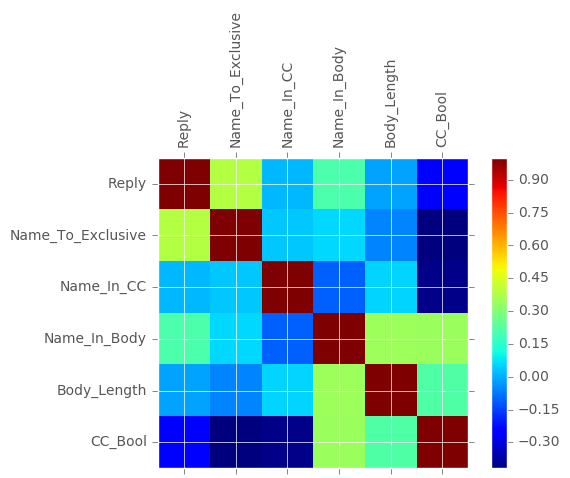

In [28]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

In [29]:
df2.isnull().sum()

Subject           0
Body              0
From              0
To              104
CC              334
               ... 
Name_In_CC        0
Name_In_Body      0
Body_Length       0
CC_Bool           0
Body_New          0
dtype: int64

In [30]:
df2.isnull().sum().sum()

440L

In [31]:
pd.crosstab(df2.Reply, df2.Name_To_Exclusive, dropna = False)

Name_To_Exclusive,0,1
Reply,,
0,421,108
1,15,48
